Loading data

In [ ]:
# Step 1: Set up Kaggle API
from google.colab import files
files.upload() # Upload your kaggle.json here

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 2: Download the dataset from Kaggle
!kaggle datasets download -d ninadaithal/imagesoasis
!unzip -q imagesoasis.zip -d dataset # Adjust based on the actual dataset structure


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/ninadaithal/imagesoasis
License(s): Apache 2.0
100% 1.23G/1.23G [00:58<00:00, 28.9MB/s]
100% 1.23G/1.23G [00:58<00:00, 22.7MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/dataset/Data


'Mild Dementia'  'Moderate Dementia'  'Non Demented'  'Very mild Dementia'


In [ ]:
!ls /content/dataset/Data


'Mild Dementia'  'Moderate Dementia'  'Non Demented'  'Very mild Dementia'


In [ ]:
!echo "Mild Dementia:" $(ls /content/dataset/Data/'Mild Dementia' | wc -l) "images"
!echo "Moderate Dementia:" $(ls /content/dataset/Data/'Moderate Dementia' | wc -l) "images"
!echo "Non Demented:" $(ls /content/dataset/Data/'Non Demented' | wc -l) "images"
!echo "Very mild Dementia:" $(ls /content/dataset/Data/'Very mild Dementia' | wc -l) "images"


Mild Dementia: 5002 images
Moderate Dementia: 488 images
Non Demented: 67222 images
Very mild Dementia: 13725 images


Visualization

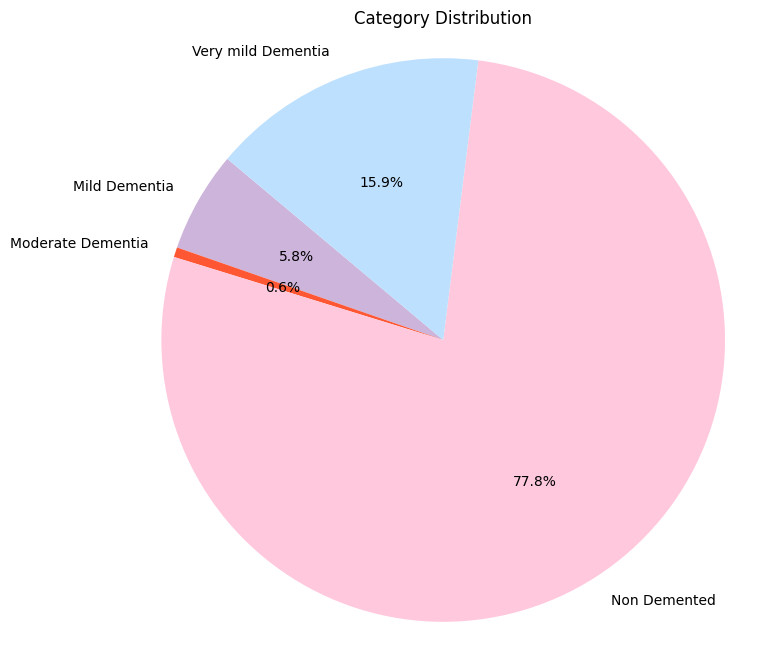

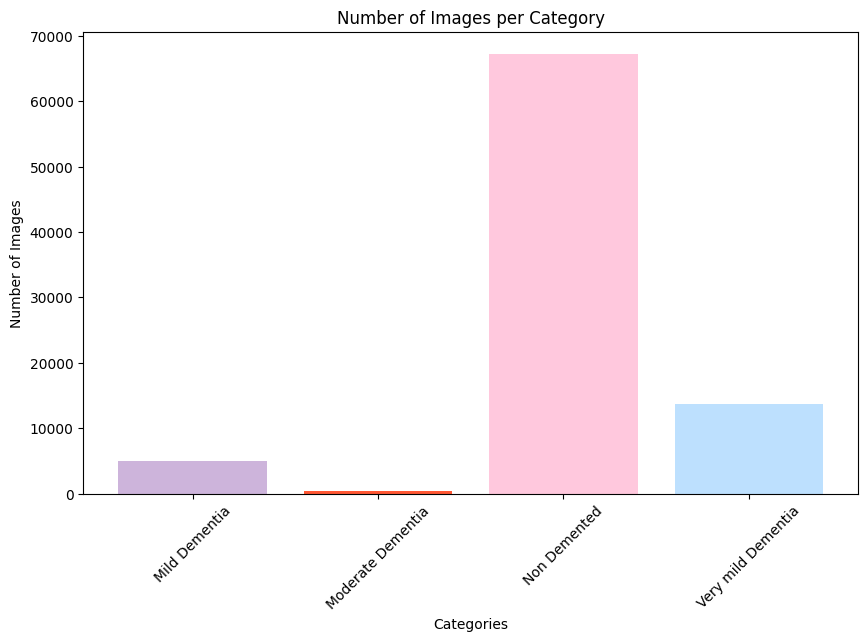

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_in_categories(directory_path):
    categories = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']
    counts = []
    for category in categories:
        category_path = os.path.join(directory_path, category)
        count = len([name for name in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, name))])
        counts.append(count)
    return categories, counts

# Directory containing the dataset
dataset_directory = '/content/dataset/Data'

# Count images in each category
categories, counts = count_images_in_categories(dataset_directory)

# Define a palette of colors with a bright color for 'Moderate Dementia'
colors = ['#cdb4db', '#ff5733', '#ffc8dd', '#bde0fe']  # Bright orange for 'Moderate Dementia'

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')
plt.axis('equal')
plt.show()

# Plotting bar graph
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=colors)
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images per Category')
plt.xticks(rotation=45)
plt.show()


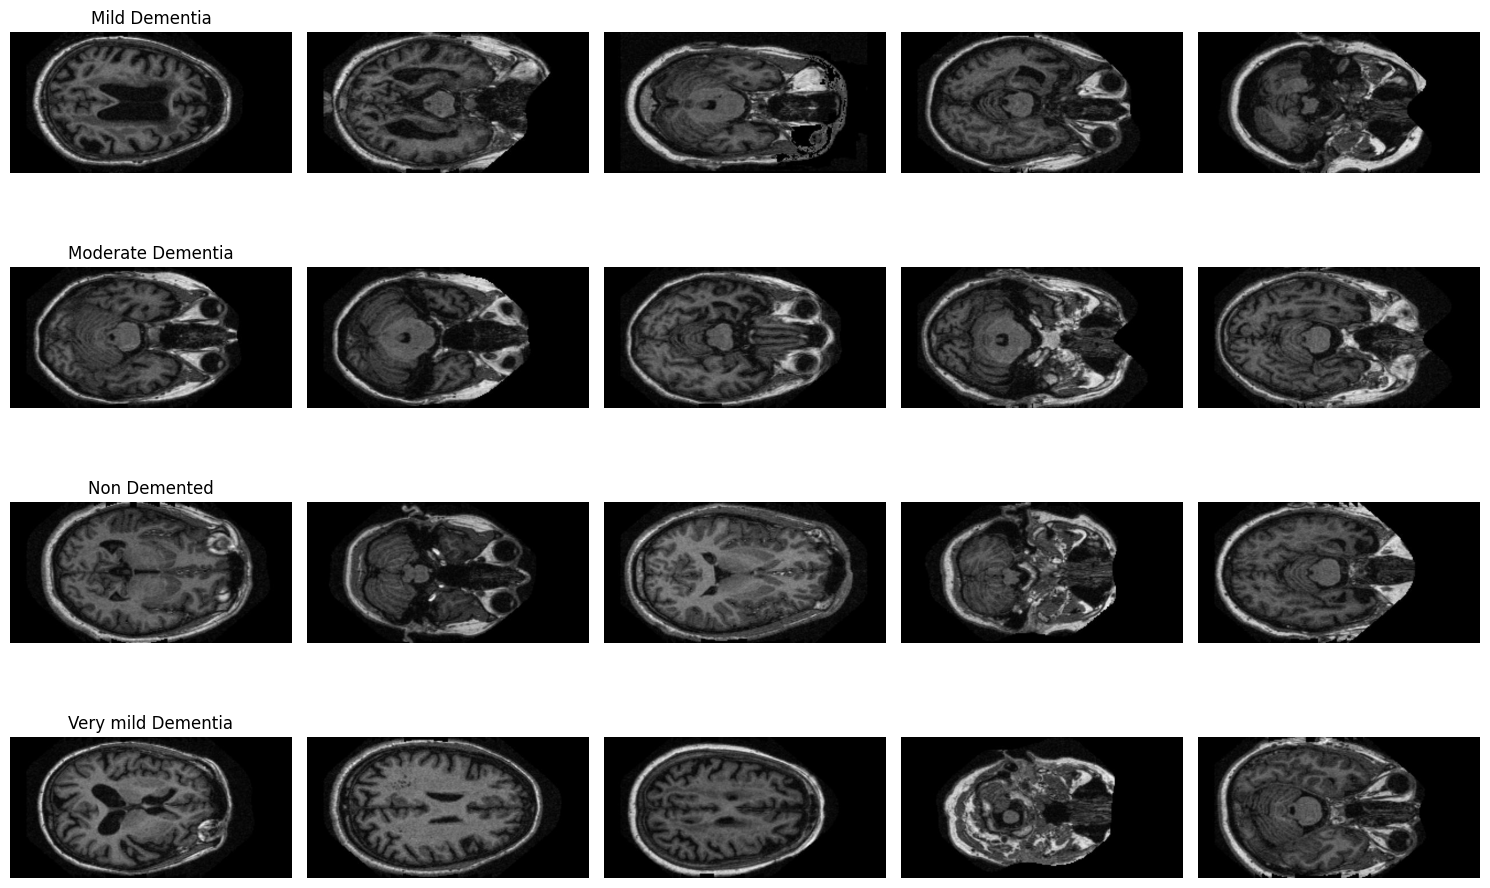

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to your dataset
base_path = '/content/dataset/Data'

# Define the categories
categories = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']

# Set the number of images to display from each category
num_images = 5

# Set up matplotlib figures
fig, axs = plt.subplots(len(categories), num_images, figsize=(15, 10))

for i, category in enumerate(categories):
    # Get the list of image files
    images = os.listdir(os.path.join(base_path, category))
    for j in range(num_images):
        # Open an image
        img_path = os.path.join(base_path, category, images[j])
        img = Image.open(img_path)

        # Plot the image
        ax = axs[i, j]
        ax.imshow(img)
        ax.axis('off')
        if j == 0:
            ax.set_title(f"{category}")

y
plt.tight_layout()
plt.show()


After Handling Data imbalance

In [ ]:
import os

def count_images(directory_path):
    total_images = 0
    categories_counts = {}
    categories = os.listdir(directory_path)

    for category in categories:
        category_path = os.path.join(directory_path, category)
        # Count files, assuming all entries in the directory are images
        count = len([name for name in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, name))])
        categories_counts[category] = count
        total_images += count

    return total_images, categories_counts

# Define directories
train_dir = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/Train"
dev_dir = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/dev"
test_dir = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/test"

# Get counts
train_total, train_counts = count_images(train_dir)
dev_total, dev_counts = count_images(dev_dir)
test_total, test_counts = count_images(test_dir)

# Print the results
print(f"Total images in Train directory: {train_total}")
print("Number of images per category in Train directory:", train_counts)
print(f"Total images in Dev directory: {dev_total}")
print("Number of images per category in Dev directory:", dev_counts)
print(f"Total images in Test directory: {test_total}")
print("Number of images per category in Test directory:", test_counts)


Total images in Train directory: 10000
Number of images per category in Train directory: {'Non Demented': 2500, 'Very mild Dementia': 2500, 'Mild Dementia': 2500, 'Moderate Dementia': 2500}
Total images in Dev directory: 674
Number of images per category in Dev directory: {'Moderate Dementia': 74, 'Mild Dementia': 200, 'Very mild Dementia': 200, 'Non Demented': 200}
Total images in Test directory: 673
Number of images per category in Test directory: {'Moderate Dementia': 73, 'Mild Dementia': 200, 'Non Demented': 200, 'Very mild Dementia': 200}


Decisiontree

In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define directories
train_dir = "path_to_train_directory"
dev_dir = "path_to_dev_directory"

# Define directories
train_dir = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/Train"
dev_dir = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/dev"
test_dir = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/test"

# Function to load images, resize, and convert to grayscale
def load_images(directory_path, target_size=(128, 128)):
    images = []
    labels = []
    for subdir, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Read and preprocess the image
                img_path = os.path.join(subdir, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
                img = cv2.resize(img, target_size)  # Resize image
                img = img.flatten()  # Flatten the image
                images.append(img)

                # Get the label from the directory name
                label = os.path.basename(subdir)
                labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess the data
train_images, train_labels = load_images(train_dir)
dev_images, dev_labels = load_images(dev_dir)

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
dev_labels_encoded = label_encoder.transform(dev_labels)


Development Set Accuracy: 0.7477744807121661
Classification Report:
                     precision    recall  f1-score   support

     Mild Dementia       0.78      0.84      0.81       200
 Moderate Dementia       0.98      0.82      0.90        74
      Non Demented       0.72      0.66      0.68       200
Very mild Dementia       0.68      0.71      0.70       200

          accuracy                           0.75       674
         macro avg       0.79      0.76      0.77       674
      weighted avg       0.75      0.75      0.75       674

Confusion Matrix:
 [[169   0  16  15]
 [  5  61   2   6]
 [ 21   1 131  47]
 [ 23   0  34 143]]


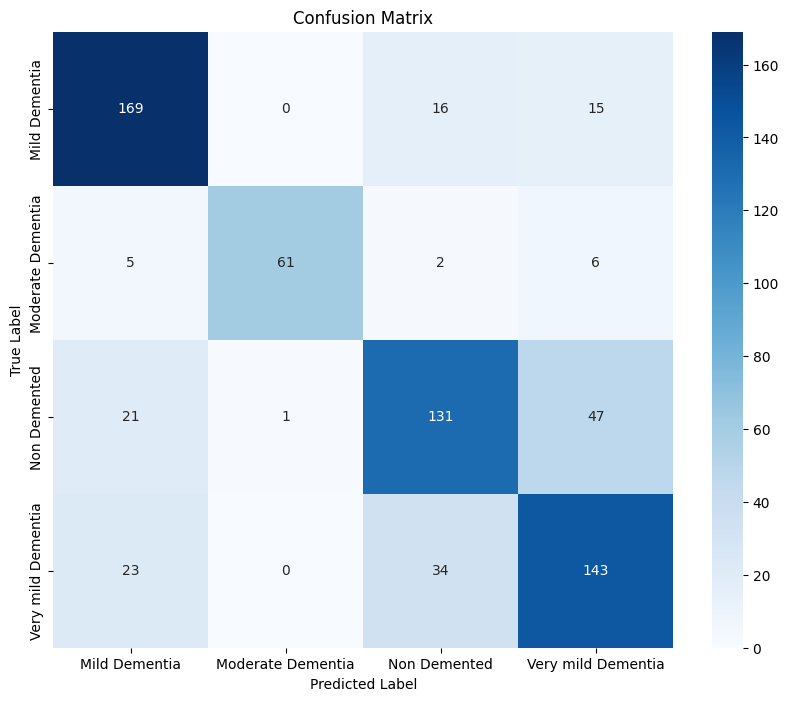

In [ ]:
# Initialize the Decision Tree classifier with a maximum depth of 4 and enable multi-threading
tree_classifier = DecisionTreeClassifier(max_depth=30, random_state=42)

# Train the classifier
tree_classifier.fit(train_images, train_labels_encoded)

# Predict on the development set
dev_predictions = tree_classifier.predict(dev_images)

# Evaluate the model
accuracy = accuracy_score(dev_labels_encoded, dev_predictions)
conf_matrix = confusion_matrix(dev_labels_encoded, dev_predictions)
classification_rep = classification_report(dev_labels_encoded, dev_predictions, target_names=label_encoder.classes_)

# Print results
print("Development Set Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Test Set Accuracy: 0.7236255572065379
Test Classification Report:
                     precision    recall  f1-score   support

     Mild Dementia       0.79      0.77      0.78       200
 Moderate Dementia       0.97      0.84      0.90        73
      Non Demented       0.67      0.62      0.65       200
Very mild Dementia       0.64      0.74      0.69       200

          accuracy                           0.72       673
         macro avg       0.77      0.74      0.75       673
      weighted avg       0.73      0.72      0.73       673

Test Confusion Matrix:
 [[153   1  25  21]
 [  4  61   4   4]
 [ 17   0 124  59]
 [ 19   1  31 149]]


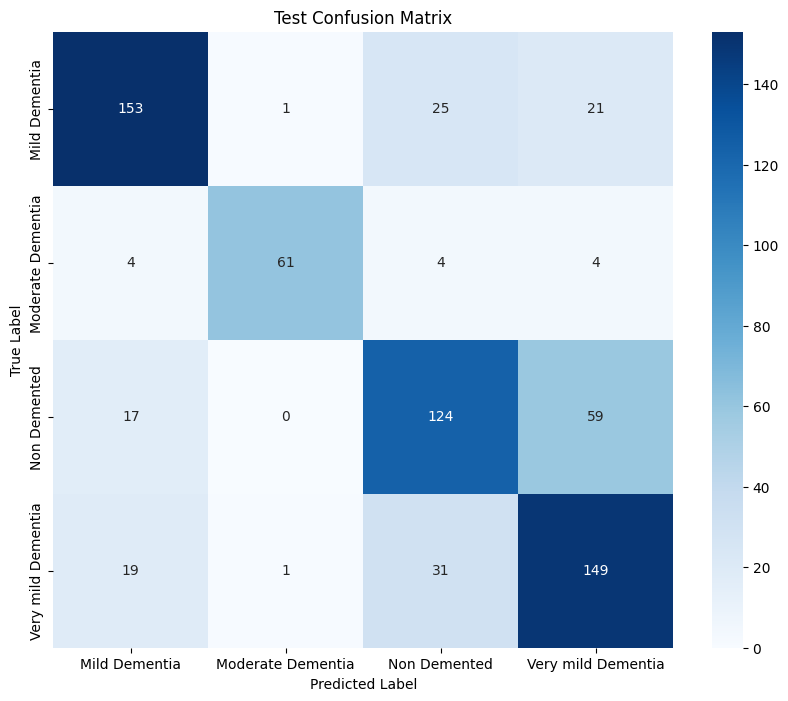

In [ ]:
# Load and preprocess the test data
test_images, test_labels = load_images(test_dir)
test_labels_encoded = label_encoder.transform(test_labels)

# Predict on the test set
test_predictions = tree_classifier.predict(test_images)

# Evaluate the model on the test set
test_accuracy = accuracy_score(test_labels_encoded, test_predictions)
test_conf_matrix = confusion_matrix(test_labels_encoded, test_predictions)
test_classification_rep = classification_report(test_labels_encoded, test_predictions, target_names=label_encoder.classes_)

# Print results
print("Test Set Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_classification_rep)
print("Test Confusion Matrix:\n", test_conf_matrix)

# Plot confusion matrix for test set
plt.figure(figsize=(10, 8))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Test Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Adaboost

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Development Set Accuracy with AdaBoost: 0.9228486646884273
Classification Report with AdaBoost:
                     precision    recall  f1-score   support

     Mild Dementia       0.97      0.97      0.97       200
 Moderate Dementia       1.00      0.86      0.93        74
      Non Demented       0.89      0.89      0.89       200
Very mild Dementia       0.89      0.93      0.91       200

          accuracy                           0.92       674
         macro avg       0.94      0.91      0.92       674
      weighted avg       0.92      0.92      0.92       674

Confusion Matrix with AdaBoost:
 [[194   0   5   1]
 [  1  64   7   2]
 [  3   0 178  19]
 [  3   0  11 186]]


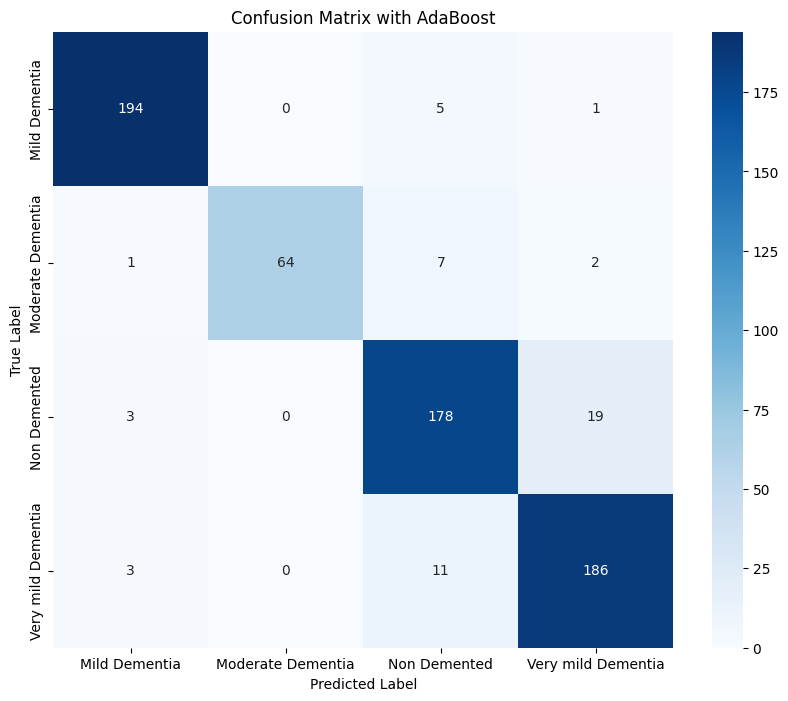

In [ ]:
import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load images, resize, and convert to grayscale
def load_images(directory_path, target_size=(128, 128)):
    images = []
    labels = []
    for subdir, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(subdir, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, target_size)
                img = img.flatten()
                images.append(img)
                label = os.path.basename(subdir)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess the data
train_dir = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/Train"
dev_dir = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/dev"
train_images, train_labels = load_images(train_dir)
dev_images, dev_labels = load_images(dev_dir)

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
dev_labels_encoded = label_encoder.transform(dev_labels)

# Initialize AdaBoost with a Decision Tree as the base classifier
base_estimator = DecisionTreeClassifier(max_depth=10, random_state=42)
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=42)

# Train the AdaBoost classifier
ada_boost.fit(train_images, train_labels_encoded)

# Predict on the development set
dev_predictions = ada_boost.predict(dev_images)

# Evaluate the AdaBoost model
accuracy = accuracy_score(dev_labels_encoded, dev_predictions)
conf_matrix = confusion_matrix(dev_labels_encoded, dev_predictions)
classification_rep = classification_report(dev_labels_encoded, dev_predictions, target_names=label_encoder.classes_)

# Print results
print("Development Set Accuracy with AdaBoost:", accuracy)
print("Classification Report with AdaBoost:\n", classification_rep)
print("Confusion Matrix with AdaBoost:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix with AdaBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Test Set Accuracy with AdaBoost: 0.9093610698365527
Classification Report for Test Set with AdaBoost:
                     precision    recall  f1-score   support

     Mild Dementia       0.93      0.97      0.95       200
 Moderate Dementia       1.00      0.93      0.96        73
      Non Demented       0.90      0.84      0.87       200
Very mild Dementia       0.87      0.91      0.89       200

          accuracy                           0.91       673
         macro avg       0.92      0.91      0.92       673
      weighted avg       0.91      0.91      0.91       673

Confusion Matrix for Test Set with AdaBoost:
 [[194   0   5   1]
 [  3  68   1   1]
 [  6   0 168  26]
 [  5   0  13 182]]


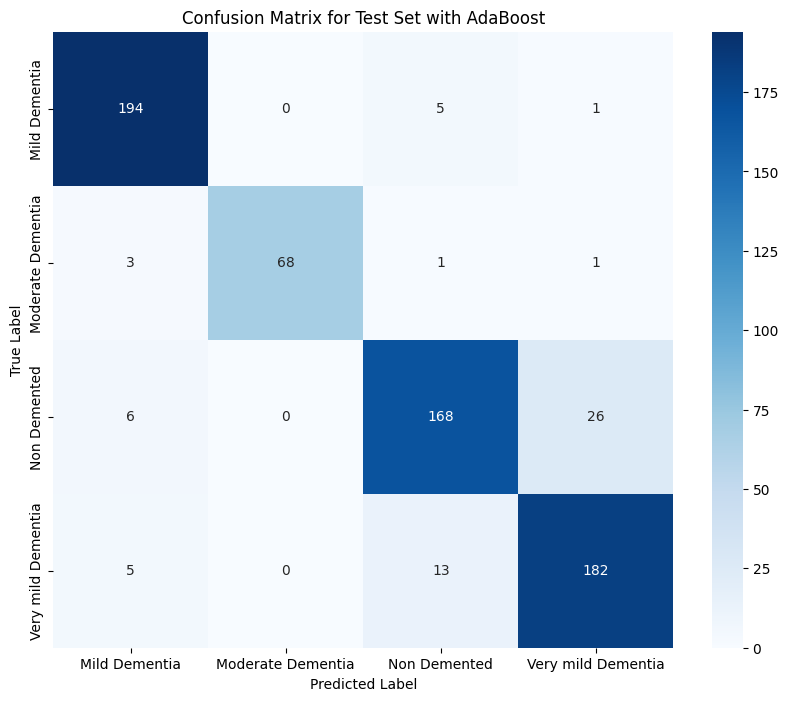

In [ ]:
# Define test directory
test_dir = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/test"

# Load and preprocess the test data
test_images, test_labels = load_images(test_dir)

# Encode test labels
test_labels_encoded = label_encoder.transform(test_labels)

# Predict on the test set
test_predictions = ada_boost.predict(test_images)

# Evaluate the AdaBoost model on the test set
test_accuracy = accuracy_score(test_labels_encoded, test_predictions)
test_conf_matrix = confusion_matrix(test_labels_encoded, test_predictions)
test_classification_rep = classification_report(test_labels_encoded, test_predictions, target_names=label_encoder.classes_)

# Print results for test set
print("Test Set Accuracy with AdaBoost:", test_accuracy)
print("Classification Report for Test Set with AdaBoost:\n", test_classification_rep)
print("Confusion Matrix for Test Set with AdaBoost:\n", test_conf_matrix)

# Plot confusion matrix for test set
plt.figure(figsize=(10, 8))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Test Set with AdaBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


KNN


Dev Metrics:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97

Test Metrics:
Accuracy: 0.95
Precision: 0.95
Recall: 0.95


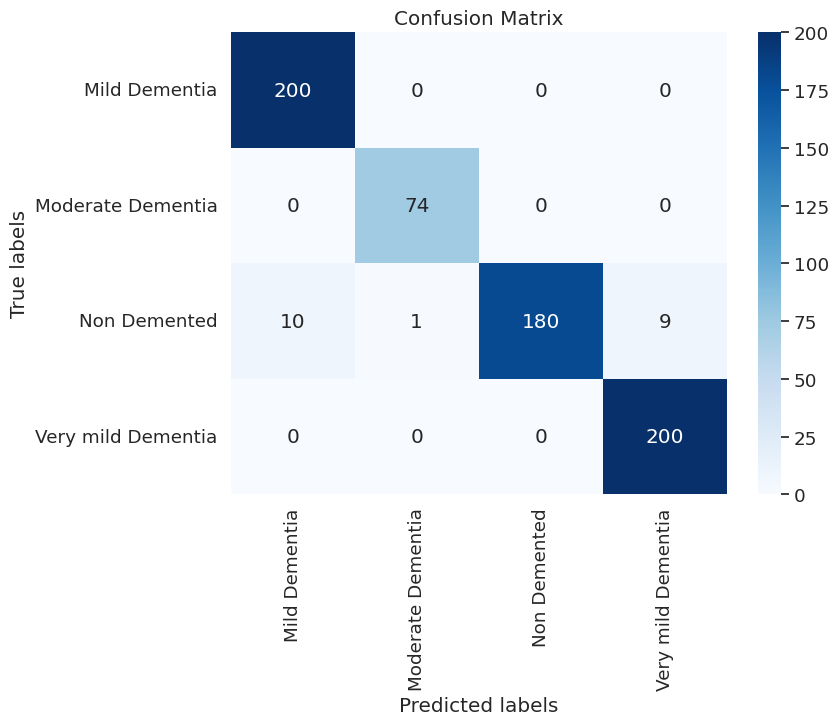

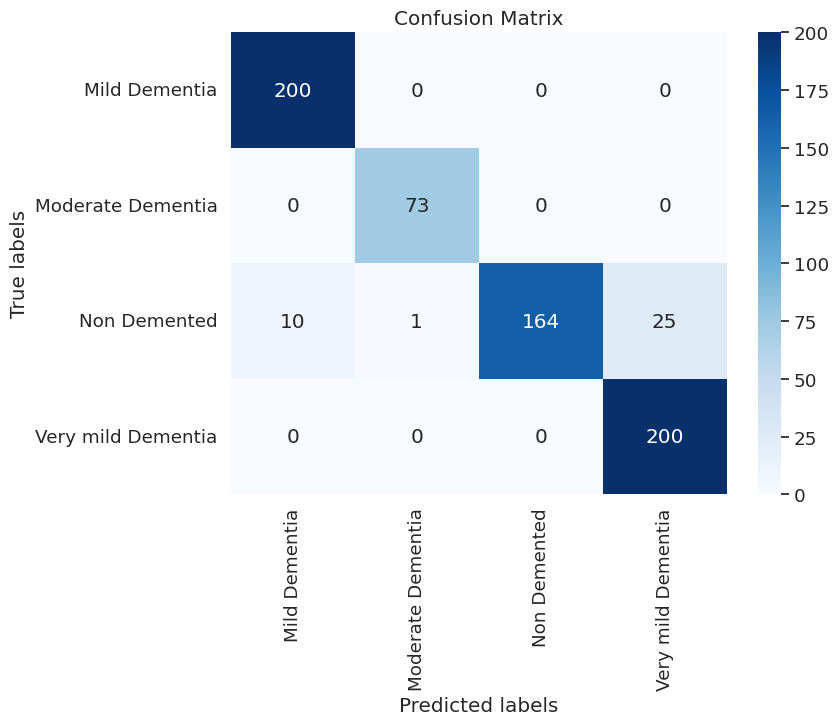

In [ ]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load images from a directory and flatten them for KNN
def load_images_from_directory(directory_path):
    images = []
    labels = []
    for label in os.listdir(directory_path):
        label_path = os.path.join(directory_path, label)
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            try:
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
                if image is not None:
                    image = cv2.resize(image, (100, 100))  # Resize image to a common size
                    images.append(image.flatten())  # Flatten the image to use as a feature vector
                    labels.append(label)  # Append label
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")
    return np.array(images), np.array(labels)

# Function to encode labels numerically
def encode_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    return encoded_labels, label_encoder.classes_

# Function to evaluate the model using multiple metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, conf_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
train_directory = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/Train"
dev_directory = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/dev"
test_directory = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/test"
# Load training data
#train_directory = '/content/drive/MyDrive/FinalML_copy/Train'
X_train, y_train = load_images_from_directory(train_directory)

# Encode labels
y_train_encoded, class_names = encode_labels(y_train)

# Scale image data to [0, 1]
X_train = X_train.astype(np.float32) / 255.0

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_encoded)

# Load and prepare dev data
#dev_directory = '/content/drive/MyDrive/FinalML_copy/dev'
X_dev, y_dev = load_images_from_directory(dev_directory)
y_dev_encoded, _ = encode_labels(y_dev)
X_dev = X_dev.astype(np.float32) / 255.0

# Load and prepare test data
#test_directory = '/content/drive/MyDrive/FinalML_copy/test'
X_test, y_test = load_images_from_directory(test_directory)
y_test_encoded, _ = encode_labels(y_test)
X_test = X_test.astype(np.float32) / 255.0

# Evaluate model on dev data
y_dev_pred = knn.predict(X_dev)
accuracy_dev, precision_dev, recall_dev, conf_matrix_dev = evaluate_model(y_dev_encoded, y_dev_pred)

# Evaluate model on test data
y_test_pred = knn.predict(X_test)
accuracy_test, precision_test, recall_test, conf_matrix_test = evaluate_model(y_test_encoded, y_test_pred)

# Print dev metrics
print("\nDev Metrics:")
print(f"Accuracy: {accuracy_dev:.2f}")
print(f"Precision: {precision_dev:.2f}")
print(f"Recall: {recall_dev:.2f}")

# Print test metrics
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")

# Plot confusion matrix for dev data
plot_confusion_matrix(conf_matrix_dev, class_names)

# Plot confusion matrix for test data
plot_confusion_matrix(conf_matrix_test, class_names)


In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score for dev data
f1_score_dev = f1_score(y_dev_encoded, y_dev_pred, average='weighted')
print(f"Dev F1 Score: {f1_score_dev:.2f}")

# Calculate F1 score for test data
f1_score_test = f1_score(y_test_encoded, y_test_pred, average='weighted')
print(f"Test F1 Score: {f1_score_test:.2f}")


Dev F1 Score: 0.97
Test F1 Score: 0.95


ResNet50

In [ ]:
import os
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import random

def load_image_paths_and_labels(directory_path):
    """Function to load images and labels"""
    image_paths = []
    labels = []
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, file))
                labels.append(root.split(os.sep)[-1])
    return image_paths, labels

def adjust_images_per_class(images_by_class, target_count=2500):
    """Function to adjust the number of images per class"""
    adjusted_images = defaultdict(list)
    for class_name, paths in images_by_class.items():
        if len(paths) > target_count:
            adjusted_images[class_name] = random.sample(paths, target_count)
        else:
            adjusted_images[class_name] = paths * (target_count // len(paths)) + paths[:target_count % len(paths)]
    return adjusted_images

# Directories
train_dir = "/content/drive/My Drive/Colab Notebooks/finaltest_dev/train"
dev_dir = "/content/drive/My Drive/Colab Notebooks/finaltest_dev/dev"
test_dir = "/content/drive/My Drive/Colab Notebooks/finaltest_dev/test"

# Load train, dev, and optionally test images
train_image_paths, train_labels = load_image_paths_and_labels(train_dir)
dev_image_paths, dev_labels = load_image_paths_and_labels(dev_dir)

# Adjust train images per class
train_images_by_class = defaultdict(list)
for path, label in zip(train_image_paths, train_labels):
    train_images_by_class[label].append(path)
adjusted_train_images = adjust_images_per_class(train_images_by_class)

# Encode labels
combined_labels = list(set(train_labels).union(dev_labels))
label_encoder = LabelEncoder()
label_encoder.fit(combined_labels)
train_labels_encoded = label_encoder.transform(train_labels)
dev_labels_encoded = label_encoder.transform(dev_labels)

# Prepare data for model
adjusted_train_filenames = []
adjusted_train_labels = []
for class_name, paths in adjusted_train_images.items():
    adjusted_train_filenames.extend(paths)
    adjusted_train_labels.extend([class_name] * len(paths))

# Data generators using ResNet50's preprocess_input
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
dev_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': adjusted_train_filenames, 'class': adjusted_train_labels}),
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=32,
    shuffle=True)

dev_generator = dev_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': dev_image_paths, 'class': dev_labels}),
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=32,
    shuffle=False)




Found 10000 validated image filenames belonging to 4 classes.
Found 200 validated image filenames belonging to 4 classes.


In [ ]:
import os
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import random

# Assuming your data loading and preprocessing code remains the same...

# Initialize ResNet50 base model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Add custom layers on top of ResNet50 base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # A dense layer with 1024 units
x = Dropout(0.5)(x)  # Dropout layer to prevent overfitting
predictions = Dense(len(np.unique(combined_labels)), activation='softmax')(x)

# Final model setup
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Lower learning rate to improve training stability
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights for handling class imbalance
unique_classes = np.unique(train_labels_encoded)
class_weights = compute_class_weight('balanced', classes=unique_classes, y=train_labels_encoded)
class_weights_dict = dict(enumerate(class_weights))

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('resnet50_model_best.h5', save_best_only=True, monitor='val_accuracy')

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # You may adjust this based on the training process
    validation_data=dev_generator,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 0.9311 - accuracy: 0.6335

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 76s 150ms/step - loss: 0.9311 - accuracy: 0.6335 - val_loss: 0.7515 - val_accuracy: 0.6650
Epoch 2/10
313/313 [==============================] - 48s 152ms/step - loss: 0.3439 - accuracy: 0.8250 - val_loss: 0.4603 - val_accuracy: 0.8050
Epoch 3/10
313/313 [==============================] - 46s 144ms/step - loss: 0.4467 - accuracy: 0.8009 - val_loss: 0.5930 - val_accuracy: 0.7750
Epoch 4/10
313/313 [==============================] - 46s 147ms/step - loss: 0.3316 - accuracy: 0.8496 - val_loss: 0.2602 - val_accuracy: 0.9000
Epoch 5/10
313/313 [==============================] - 46s 146ms/step - loss: 0.1565 - accuracy: 0.9128 - val_loss: 0.1913 - val_accuracy: 0.9200
Epoch 6/10
313/313 [==============================] - 47s 147ms/step - loss: 0.1273 - accuracy: 0.9376 - val_loss: 0.5500 - val_accuracy: 0.8050
Epoch 7/10
313/313 [==============================] - 44s 140ms/step - loss: 0.2104 - accuracy: 0.9066 - val_loss: 0.7060 - val_accuracy: 0.7

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Assume 4 classes for the example: Non-Demented, Very Mild Dementia, Mild Dementia, and Moderate Dementia
number_of_classes = 4

# Initialize ResNet50 base model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Add custom layers on top of ResNet50 base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # A dense layer with 1024 units
x = Dropout(0.5)(x)  # Dropout layer to prevent overfitting
predictions = Dense(number_of_classes, activation='softmax')(x)

# Final model setup
model = Model(inputs=base_model.input, outputs=predictions)

# Print the model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

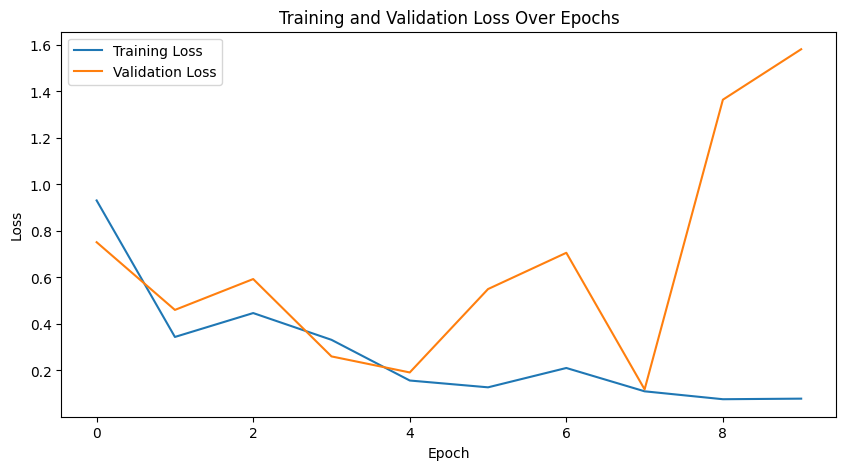

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


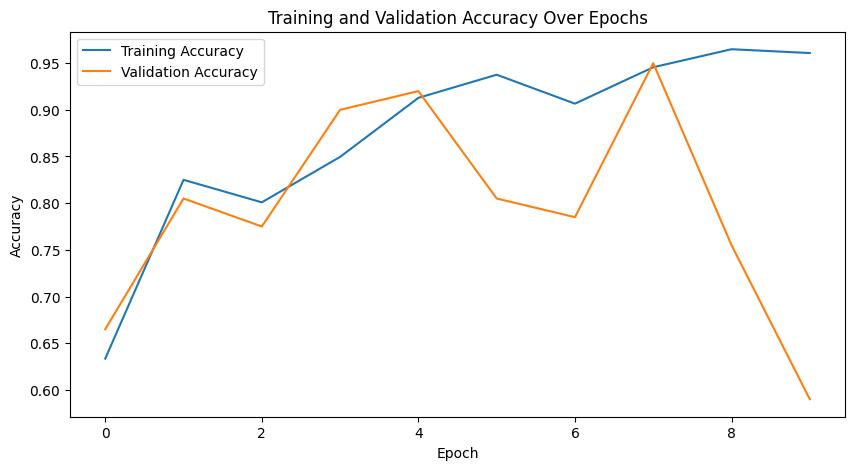

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Correctly load the best model
best_model = load_model('resnet50_model_best.h5')

# We need to reset the validation generator before making predictions
dev_generator.reset()

# Predict classes with the best model
dev_pred = best_model.predict(dev_generator, steps=dev_generator.n // dev_generator.batch_size + 1)
dev_pred_classes = np.argmax(dev_pred, axis=1)

# IMPORTANT: Ensure that the true classes order corresponds to the predictions
# This method assumes that the generator's shuffle is set to False
true_classes = dev_generator.classes

# Since the predict_generator method might retrieve more samples than existing due to rounding,
# We ensure to cut the predicted classes to the true size
dev_pred_classes = dev_pred_classes[:len(true_classes)]

# Calculate accuracy and F1 score
dev_accuracy = accuracy_score(true_classes, dev_pred_classes)
dev_f1_score = f1_score(true_classes, dev_pred_classes, average='weighted')

print("Validation Accuracy:", dev_accuracy)
print("Validation F1 Score:", dev_f1_score)


7/7 [==============================] - 2s 117ms/step
Validation Accuracy: 0.95
Validation F1 Score: 0.9496779388083736


In [ ]:
#test_dir = "/content/drive/My Drive/Colab Notebooks/finaltest_dev/test"  # Replace with your test data directory

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode='sparse',  # Use 'sparse' if your labels are integer, 'categorical' if one-hot encoded
    batch_size=32,  # Adjust depending on your hardware's capabilities
    shuffle=False  # Important for later mapping the predictions
)


Found 200 images belonging to 4 classes.


In [ ]:



# Load the best model
best_model = load_model('resnet50_model_best.h5')

# Predict on the test set
#test_generator.reset()  # Resetting the generator
test_pred = best_model.predict(test_generator, steps=test_generator.n // test_generator.batch_size + 1)
test_pred_classes = np.argmax(test_pred, axis=1)

# Adjust prediction array length to match true labels size
test_pred_classes = test_pred_classes[:len(test_generator.classes)]

# True classes
true_test_classes = test_generator.classes

# Calculate accuracy and F1 score for the test set
test_accuracy = accuracy_score(true_test_classes, test_pred_classes)
test_f1_score = f1_score(true_test_classes, test_pred_classes, average='weighted')

print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1_score)


7/7 [==============================] - 51s 8s/step
Test Accuracy: 0.93
Test F1 Score: 0.9289184306361671


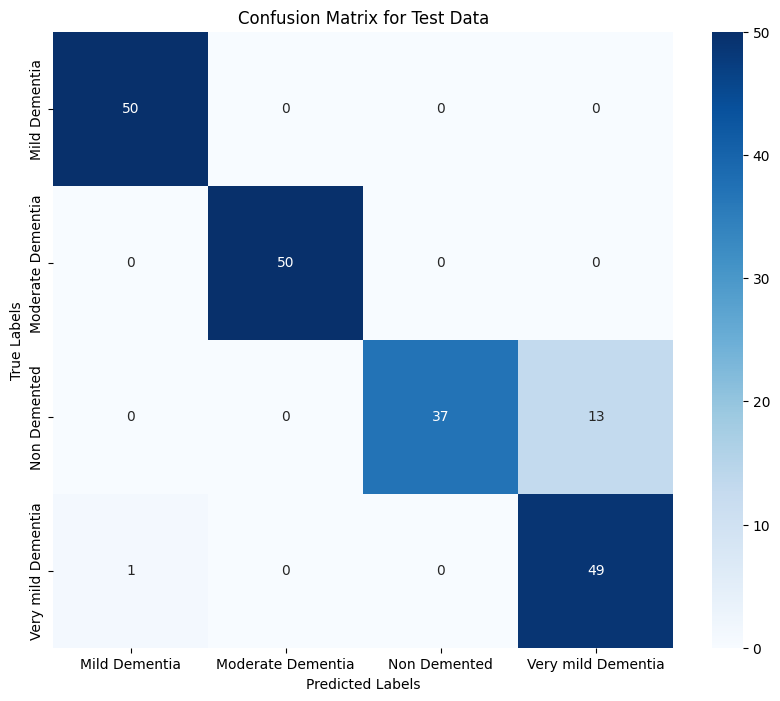

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_test_labels = test_generator.classes

index_to_class = {v: k for k, v in test_generator.class_indices.items()}
class_names = [index_to_class[i] for i in range(len(index_to_class))]

# Compute the confusion matrix as before
cm = confusion_matrix(true_test_labels, test_pred_classes)

# Plot the confusion matrix with class names
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Test Data')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


EfficientNetB0

In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def load_image_paths_and_labels(directory_path):
    image_paths = []
    labels = []
    category_paths = {}

    for root, dirs, files in os.walk(directory_path):
        category = root.split(os.sep)[-1]
        files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
        paths = [os.path.join(root, file) for file in files]
        if paths:
            category_paths[category] = paths

    for category, paths in category_paths.items():
        image_paths.extend(paths)
        labels.extend([category] * len(paths))

    return image_paths, labels

# Define directories
train_dir = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/Train"
dev_dir = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/dev"
test_dir = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/test"

# Load data
train_image_paths, train_labels = load_image_paths_and_labels(train_dir)
dev_image_paths, dev_labels = load_image_paths_and_labels(dev_dir)
test_image_paths, test_labels = load_image_paths_and_labels(test_dir)

# Encode labels
label_encoder = LabelEncoder()
label_encoder.fit(train_labels + dev_labels + test_labels)  # Fit label encoder to all data
train_labels_encoded = label_encoder.transform(train_labels)
dev_labels_encoded = label_encoder.transform(dev_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Data generators
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = datagen.flow_from_dataframe(
    pd.DataFrame({'filename': train_image_paths, 'class': train_labels_encoded.astype(str)}),
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=32,
    shuffle=True
)
dev_generator = datagen.flow_from_dataframe(
    pd.DataFrame({'filename': dev_image_paths, 'class': dev_labels_encoded.astype(str)}),
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=32,
    shuffle=False
)



Found 10000 validated image filenames belonging to 4 classes.
Found 674 validated image filenames belonging to 4 classes.


22/22 [==============================] - 4s 104ms/step - loss: 0.1147 - accuracy: 0.9585
Validation Loss: 0.11471400409936905, Validation Accuracy: 0.9584569931030273
22/22 [==============================] - 4s 105ms/step
Development Set Metrics:
Accuracy: 0.9584569732937686
F1 Score: 0.9587087637062667
Precision: 0.9603676064890335
Recall: 0.9584569732937686


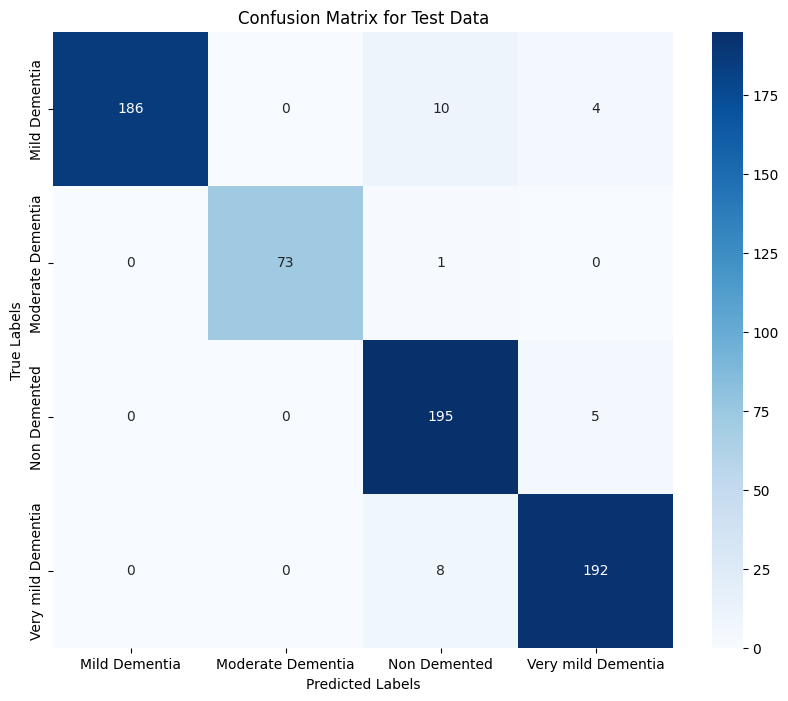

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the best saved model from the checkpoint
best_model = load_model('best_model.h5')

# Evaluate the best model on the validation set
val_loss, val_accuracy = best_model.evaluate(dev_generator)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Predictions and metrics for the development set
dev_pred = best_model.predict(dev_generator)
dev_pred_classes = np.argmax(dev_pred, axis=1)

# Get true classes for development set
true_dev_classes = dev_generator.classes

# Calculate accuracy, F1 score, precision, and recall for the development set
dev_accuracy = accuracy_score(true_dev_classes, dev_pred_classes)
dev_f1_score = f1_score(true_dev_classes, dev_pred_classes, average='weighted')
dev_precision = precision_score(true_dev_classes, dev_pred_classes, average='weighted')
dev_recall = recall_score(true_dev_classes, dev_pred_classes, average='weighted')

print(f"Development Set Metrics:\nAccuracy: {dev_accuracy}\nF1 Score: {dev_f1_score}\nPrecision: {dev_precision}\nRecall: {dev_recall}")



# Assuming 'test_generator.class_indices' is a dictionary like {'class_name_0': 0, 'class_name_1': 1, ...}
# We need to invert it to map indices to class names
index_to_class = {v: k for k, v in test_generator.class_indices.items()}
class_names = [index_to_class[i] for i in range(len(index_to_class))]

# Compute the confusion matrix as before
cm = confusion_matrix(true_dev_classes, dev_pred_classes)

# Plot the confusion matrix with class names
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Test Data')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()



16705208/16705208 [==============================] - 1s 0us/step
Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 0.4462 - accuracy: 0.8210 
Epoch 1: val_accuracy improved from -inf to 0.80119, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5338s 17s/step - loss: 0.4462 - accuracy: 0.8210 - val_loss: 0.6164 - val_accuracy: 0.8012
Epoch 2/10
313/313 [==============================] - ETA: 0s - loss: 0.2120 - accuracy: 0.9218
Epoch 2: val_accuracy did not improve from 0.80119
313/313 [==============================] - 80s 255ms/step - loss: 0.2120 - accuracy: 0.9218 - val_loss: 1.4722 - val_accuracy: 0.5504
Epoch 3/10
313/313 [==============================] - ETA: 0s - loss: 0.1432 - accuracy: 0.9486
Epoch 3: val_accuracy improved from 0.80119 to 0.87240, saving model to best_model.h5
313/313 [==============================] - 82s 262ms/step - loss: 0.1432 - accuracy: 0.9486 - val_loss: 0.4709 - val_accuracy: 0.8724
Epoch 4/10
313/313 [==============================] - ETA: 0s - loss: 0.1329 - accuracy: 0.9524
Epoch 4: val_accuracy improved from 0.87240 to 0.90653, saving model to best_model.h5
313/313 [==============================] - 83s 264ms/step - loss: 0.1329 - accuracy: 0.

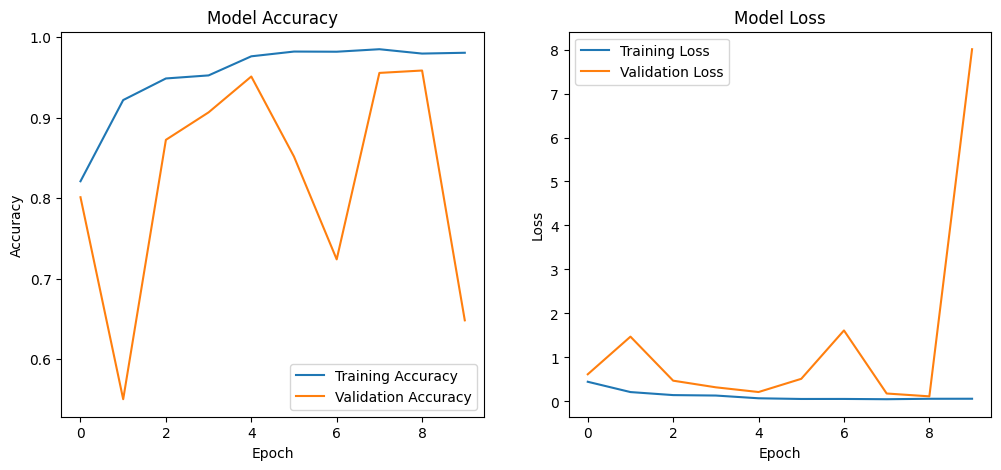

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Assumption: `train_labels_encoded` and data generators (`train_generator`, `dev_generator`) are correctly set up prior to this script.

# Model setup function without hyperparameter tuning
def build_model():
    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Add dropout layer to reduce overfitting
    x = Dense(1536, activation='relu')(x)  # Fixed to 1024 units
    predictions = Dense(len(np.unique(train_labels_encoded)), activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.001),  # Fixed learning rate
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model = build_model()

# Callbacks for early stopping to prevent overfitting and to save the best model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Fit the model
history = model.fit(
    train_generator,
    validation_data=dev_generator,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the best model on the validation set
val_loss, val_accuracy = model.evaluate(dev_generator)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Optional: Plotting the training and validation history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Load the base EfficientNetB0 model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Adding custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)  # Assuming 4 classes for the output layer

# Creating the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Print the model summary
model.summary()


16705208/16705208 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_4[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)   

Found 673 images belonging to 4 classes.
22/22 [==============================] - 3s 121ms/step
Test Set Metrics:
Accuracy: 0.9583952451708767
F1 Score: 0.9585800771799569
Precision: 0.9594025976019541
Recall: 0.9583952451708767


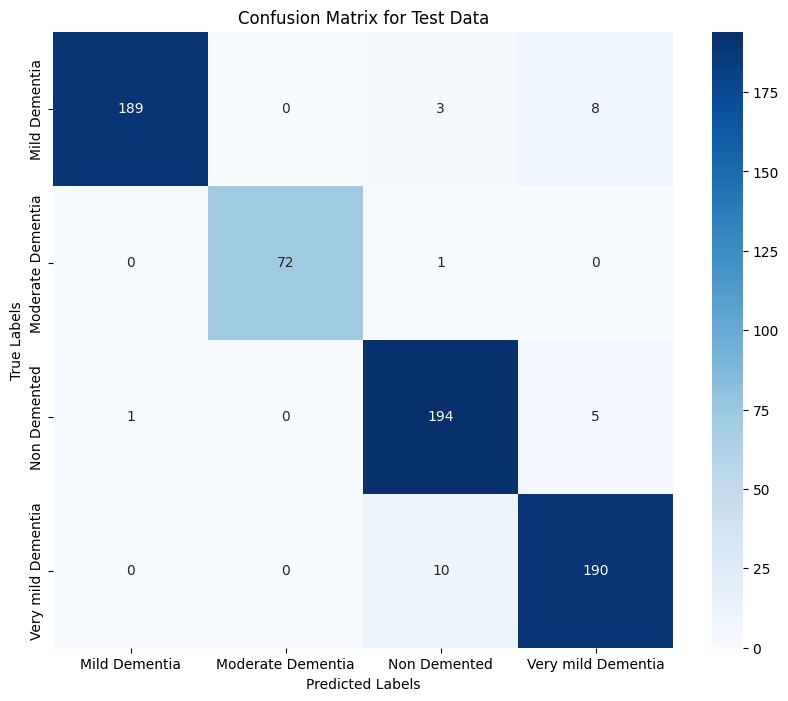

In [ ]:
# Setup for the test set
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=32,
    shuffle=False
)

# Predictions and metrics for the test set
test_pred = best_model.predict(test_generator)
test_pred_classes = np.argmax(test_pred, axis=1)

# Get true classes for test set
true_test_classes = test_generator.classes

# Calculate accuracy, F1 score, precision, and recall for the test set
test_accuracy = accuracy_score(true_test_classes, test_pred_classes)
test_f1_score = f1_score(true_test_classes, test_pred_classes, average='weighted')
test_precision = precision_score(true_test_classes, test_pred_classes, average='weighted')
test_recall = recall_score(true_test_classes, test_pred_classes, average='weighted')

print(f"Test Set Metrics:\nAccuracy: {test_accuracy}\nF1 Score: {test_f1_score}\nPrecision: {test_precision}\nRecall: {test_recall}")


# Assuming 'test_generator.class_indices' is a dictionary like {'class_name_0': 0, 'class_name_1': 1, ...}
# We need to invert it to map indices to class names
index_to_class = {v: k for k, v in test_generator.class_indices.items()}
class_names = [index_to_class[i] for i in range(len(index_to_class))]

# Compute the confusion matrix as before
cm = confusion_matrix(true_test_labels, test_pred_classes)

# Plot the confusion matrix with class names
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Test Data')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


Random forest


Dev Metrics:
Accuracy: 0.9540059347181009
Precision: 0.9552802026036251
Recall: 0.9540059347181009
F1 Score: 0.9536890588266562

Test Metrics:
Accuracy: 0.9643387815750372
Precision: 0.9667339867114978
Recall: 0.9643387815750372
F1 Score: 0.9642614991084035


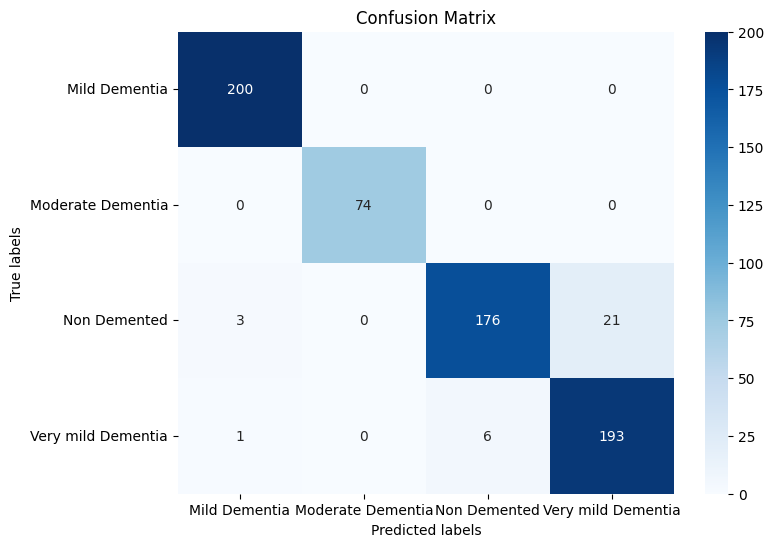

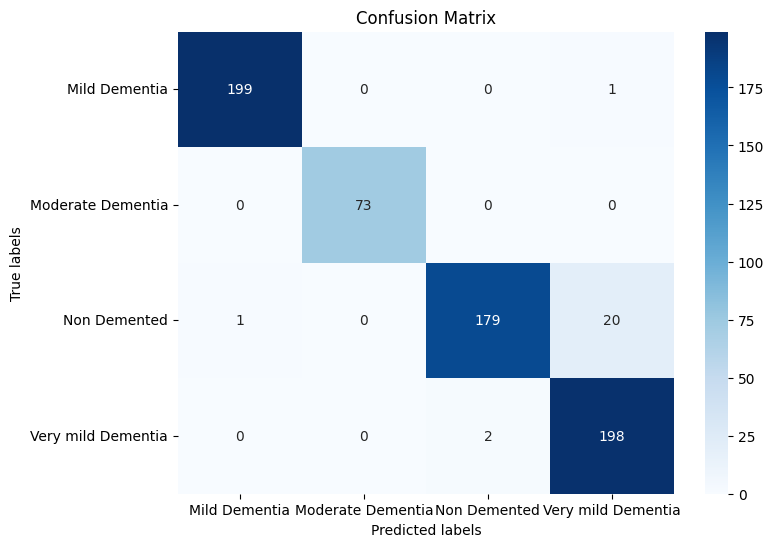

In [ ]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

def load_images_from_directory(directory_path):
    images = []
    labels = []

    for label in os.listdir(directory_path):
        label_path = os.path.join(directory_path, label)
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
            image = cv2.resize(image, (100, 100))  # Resize image to a common size
            images.append(image.flatten())  # Flatten the image to use as feature vector
            labels.append(label)  # Append label

    return np.array(images), np.array(labels)

def train_random_forest(X_train, y_train):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize Random Forest classifier
    rf.fit(X_train, y_train)  # Train the model
    return rf

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Load training data
train_directory = '/content/drive/MyDrive/FinalML_copy/Train'
X_train, y_train = load_images_from_directory(train_directory)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train Random Forest model
rf_model = train_random_forest(X_train, y_train_encoded)

# Load dev data
dev_directory = '/content/drive/MyDrive/FinalML_copy/dev'
X_dev, y_dev = load_images_from_directory(dev_directory)
y_dev_encoded = label_encoder.transform(y_dev)

# Load test data
test_directory = '/content/drive/MyDrive/FinalML_copy/test'
X_test, y_test = load_images_from_directory(test_directory)
y_test_encoded = label_encoder.transform(y_test)

# Evaluate model on dev data
y_dev_pred = rf_model.predict(X_dev)
accuracy_dev, precision_dev, recall_dev, f1_dev, conf_matrix_dev = evaluate_model(y_dev_encoded, y_dev_pred)

# Evaluate model on test data
y_test_pred = rf_model.predict(X_test)
accuracy_test, precision_test, recall_test, f1_test, conf_matrix_test = evaluate_model(y_test_encoded, y_test_pred)

# Print dev metrics
print("\nDev Metrics:")
print("Accuracy:", accuracy_dev)
print("Precision:", precision_dev)
print("Recall:", recall_dev)
print("F1 Score:", f1_dev)

# Print test metrics
print("\nTest Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

# Plot confusion matrix for dev data
plot_confusion_matrix(conf_matrix_dev, label_encoder.classes_)

# Plot confusion matrix for test data
plot_confusion_matrix(conf_matrix_test, label_encoder.classes_)


XGBoost


Dev Metrics:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Test Metrics:
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1 Score: 0.96


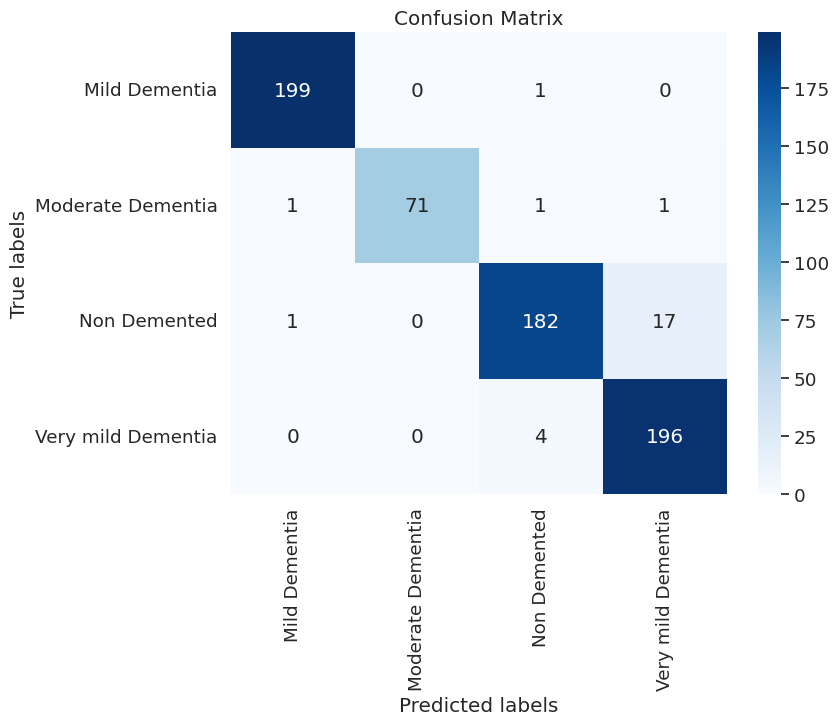

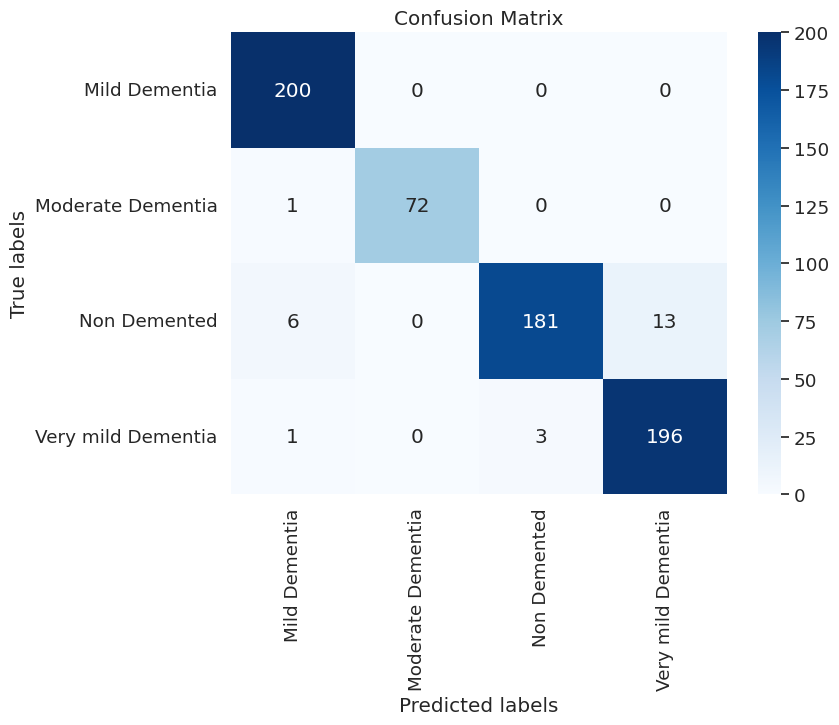

In [ ]:
import os
import cv2
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

def load_images_from_directory(directory_path):
    images = []
    labels = []
    for label in os.listdir(directory_path):
        label_path = os.path.join(directory_path, label)
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
            image = cv2.resize(image, (100, 100))  # Resize image to a common size
            images.append(image.flatten())  # Flatten the image to use as feature vector
            labels.append(label)
    return np.array(images), np.array(labels)

def encode_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    return encoded_labels, label_encoder.classes_

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Update directories
train_directory = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/Train"
dev_directory = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/dev"
test_directory = "/content/drive/My Drive/Colab Notebooks/FinalML_copy/test"

# Load training data
X_train, y_train = load_images_from_directory(train_directory)
y_train_encoded, class_names = encode_labels(y_train)

# Load dev data
X_dev, y_dev = load_images_from_directory(dev_directory)
y_dev_encoded, _ = encode_labels(y_dev)

# Load test data
X_test, y_test = load_images_from_directory(test_directory)
y_test_encoded, _ = encode_labels(y_test)

# Convert image data to float and scale to [0, 1]
X_train = X_train.astype(np.float32) / 255.0
X_dev = X_dev.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

# Create XGBoost classifier
clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(class_names), seed=42)

# Train the model
clf.fit(X_train, y_train_encoded)

# Predictions on dev data
y_dev_pred = clf.predict(X_dev)
accuracy_dev, precision_dev, recall_dev, f1_dev, conf_matrix_dev = evaluate_model(y_dev_encoded, y_dev_pred)
print("\nDev Metrics:")
print(f"Accuracy: {accuracy_dev:.2f}")
print(f"Precision: {precision_dev:.2f}")
print(f"Recall: {recall_dev:.2f}")
print(f"F1 Score: {f1_dev:.2f}")

# Predictions on test data
y_test_pred = clf.predict(X_test)
accuracy_test, precision_test, recall_test, f1_test, conf_matrix_test = evaluate_model(y_test_encoded, y_test_pred)
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")

# Plot confusion matrix for dev data
plot_confusion_matrix(conf_matrix_dev, class_names)

# Plot confusion matrix for test data
plot_confusion_matrix(conf_matrix_test, class_names)
